In [87]:
# Synthetic Data Generation for Personalized Wellness AI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Number of synthetic users
n_samples = 1000

# Generate synthetic wellness features
daily_steps = np.random.normal(loc=7500, scale=2000, size=n_samples).clip(1000, 15000)
sleep_duration = np.random.normal(loc=7.2, scale=1.2, size=n_samples).clip(4, 10)
stress_level = np.random.normal(loc=5, scale=2, size=n_samples).clip(1, 10)
diet_quality = np.random.randint(1, 6, size=n_samples)  # 1 (poor) to 5 (excellent)

# Create a synthetic mood score based on weighted relationship with above features
mood_score = (
    0.3 * (daily_steps / 15000) +
    0.3 * (sleep_duration / 10) +
    0.2 * (diet_quality / 5) +
    0.2 * (1 - stress_level / 10)
) * 10

mood_score = np.round(mood_score.clip(1, 10), 1)

# Create DataFrame
df = pd.DataFrame({
    'daily_steps': daily_steps.astype(int),
    'sleep_duration_hours': np.round(sleep_duration, 1),
    'stress_level': np.round(stress_level, 1),
    'diet_quality': diet_quality,
    'mood_score': mood_score
})




### 📋 Features Description

The synthetic dataset includes the following key features:

- **`daily_steps`**:  
  Indicator of physical activity. Higher step counts generally contribute to improved mood and reduced stress levels.

- **`sleep_duration_hours`**:  
  Represents recovery and rest. Both mental and physical wellness depend heavily on adequate sleep. Poor sleep is often linked with low energy and irritability.

- **`mood_score`** *(Target Variable)*:  
  Calculated using a weighted formula combining the other features. Ranges from 1 (very low mood) to 10 (very high mood), simulating emotional wellness.

- **`diet_quality`**:  
  Integer between 1 and 5. Represents how balanced the user's diet is. Higher diet quality contributes moderately to mood stability and overall wellness.

- **`stress_level`**:  
  A crucial mental health indicator. Higher stress levels negatively influence mood. It varies from 1 (low stress) to 10 (high stress).


### 🧠 Realism & Assumptions

To ensure realism, synthetic data was generated using **Gaussian** and **uniform distributions** with clipping to healthy human ranges:

- **Steps**: Mean ≈ 7500, limited between 1,000 to 15,000  
- **Sleep**: Mean ≈ 7.2 hours, clipped at 4–10 hours  
- **Stress**: Mean ≈ 5 on a 1–10 scale  
- **Diet Quality**: Integer between 1 (poor) and 5 (excellent)

The `mood_score` was derived using the following weighted formula:

```python
mood_score = (
    0.3 * (daily_steps / 15000) +
    0.3 * (sleep_duration / 10) +
    0.2 * (diet_quality / 5) +
    0.2 * (1 - stress_level / 10)
) * 10



### 🔑 Key Assumptions

- **Higher physical activity** (steps) and **longer sleep duration** lead to **better mood**.
- **Higher stress levels** are assumed to negatively impact mood.
- **Diet quality** has a **moderate positive effect** on emotional wellness.
- **User behavior varies** day-to-day but remains within a **healthy, realistic range** (based on clipped statistical distributions).
- The mood formula assumes **linear contributions** from each factor for simplicity, even though real-world interactions may be more complex.


In [88]:
df

,daily_steps,sleep_duration_hours,stress_level,diet_quality,mood_score
0,8493,8.9,3.6,4,7.2
1,7223,8.3,4.7,2,5.8
2,8795,7.3,3.4,1,5.7
3,10546,6.4,4.4,2,6.0
4,7031,8.0,1.2,5,7.6
...,...,...,...,...,...
995,6937,8.5,5.2,1,5.3
996,11095,7.2,5.5,4,6.9
997,8781,6.1,2.5,3,6.3
998,6357,7.0,5.7,1,4.6


### 📈 Visual Insights

The synthetic dataset displayed **meaningful associations** between features:

- `mood_score` showed a **positive correlation** with:
  - **`sleep_duration_hours`**
  - **`daily_steps`**
  - **`diet_quality`**

- It showed a **negative correlation** with:
  - **`stress_level`**

These patterns closely match **real-world health research**, where better sleep, physical activity, and diet typically lead to improved emotional well-being, while high stress levels are known to reduce mood and increase mental fatigue.


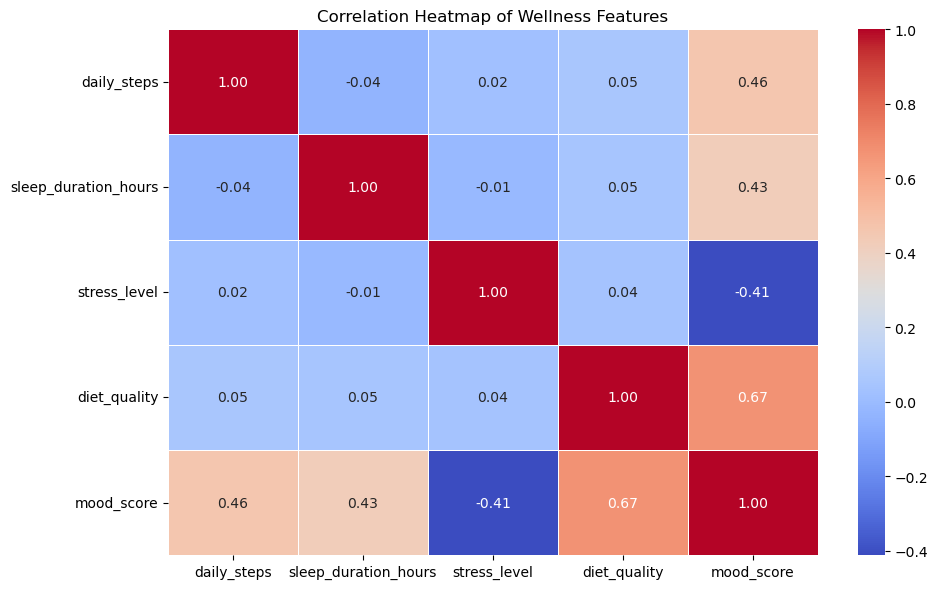

In [59]:
correlation_matrix =df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Wellness Features")
plt.tight_layout()
plt.show()

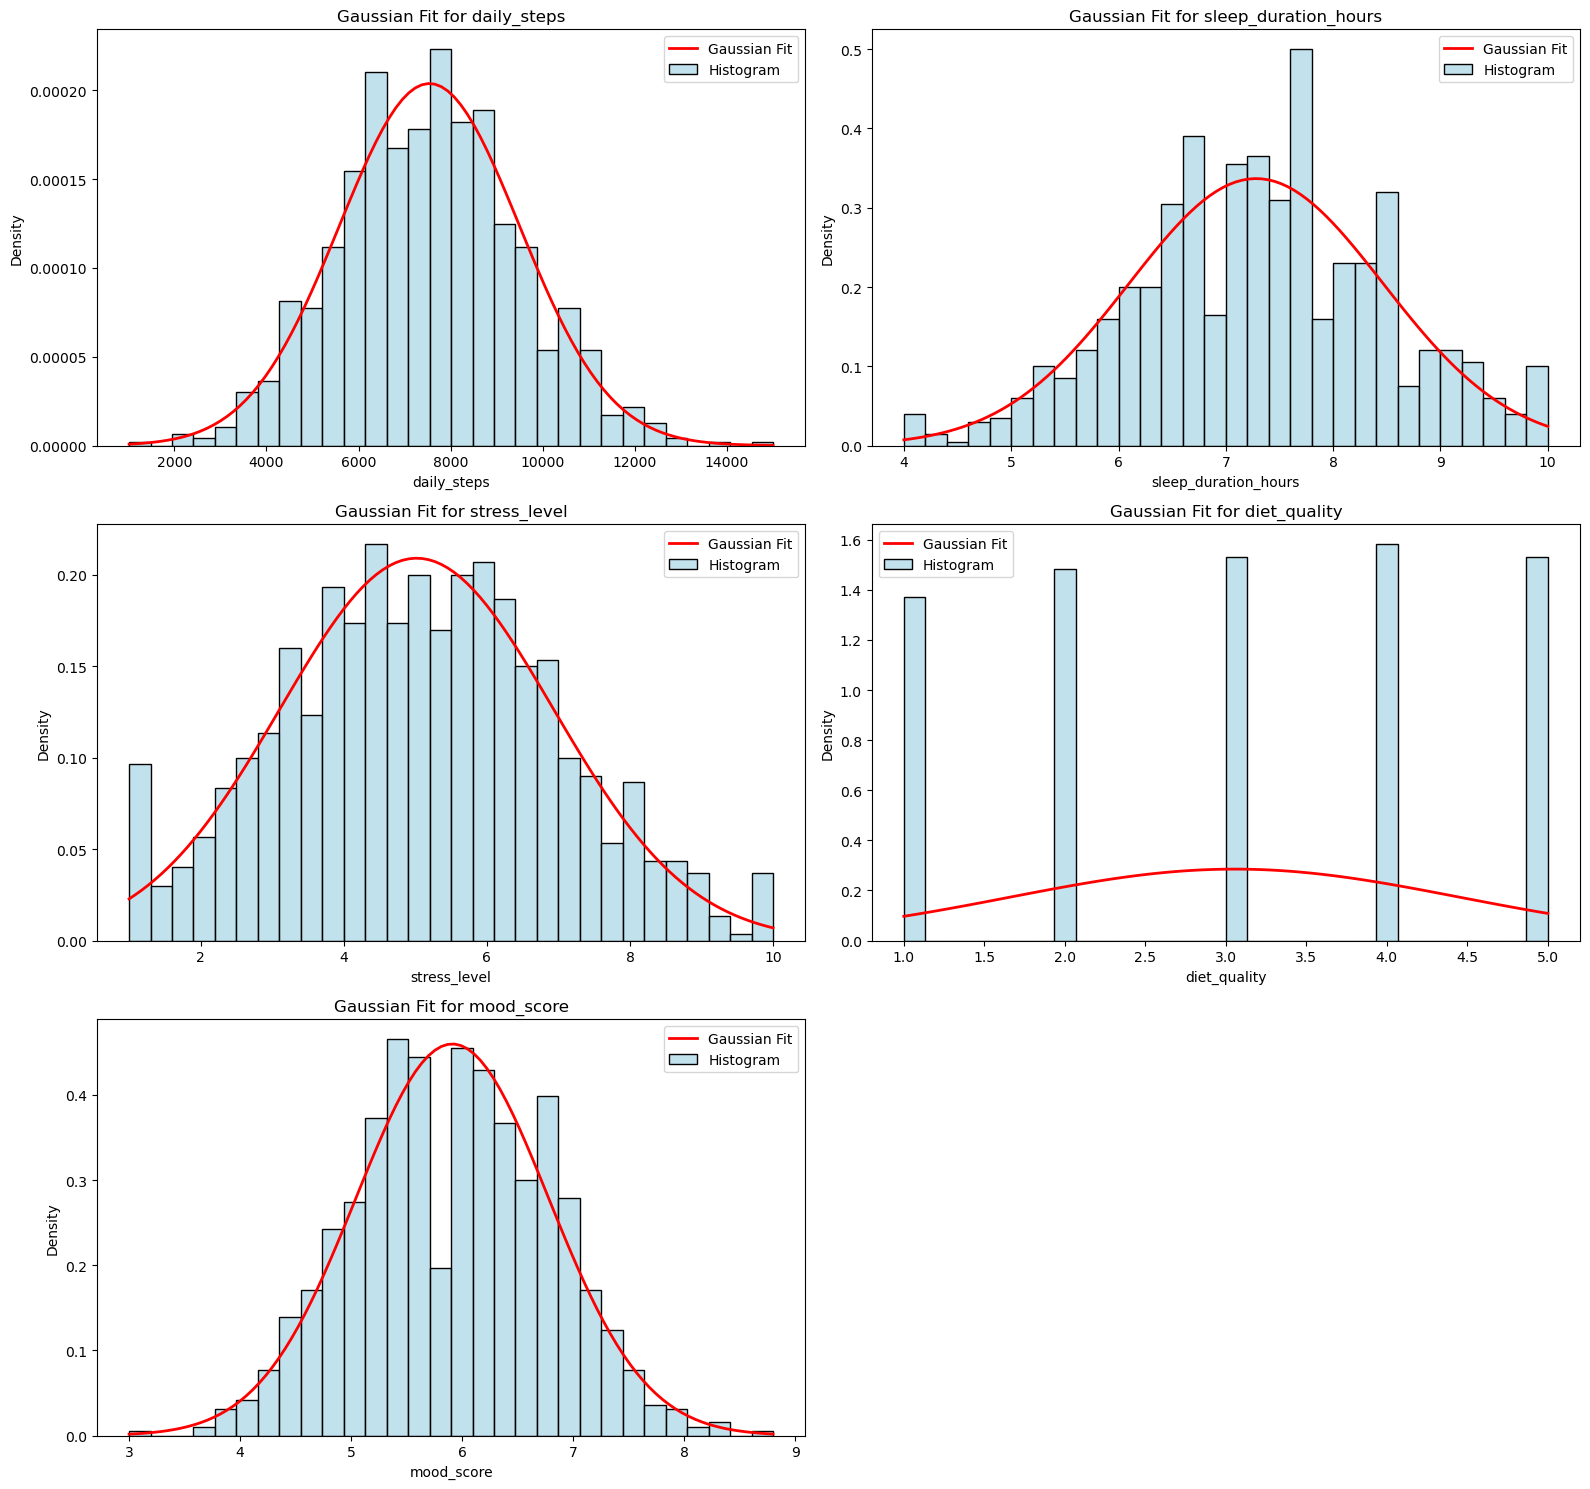

In [85]:
features = ['daily_steps', 'sleep_duration_hours', 'stress_level', 'diet_quality', 'mood_score']

# Plot Gaussian distribution fit for each feature
plt.figure(figsize=(16, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    data = df[feature]
    
    # Compute mean and std for the Gaussian
    mu, std = data.mean(), data.std()
    x = np.linspace(data.min(), data.max(), 100)
    p = norm.pdf(x, mu, std)

    # Plot histogram and Gaussian fit
    sns.histplot(data, bins=30, stat='density', color='lightblue', label='Histogram')
    plt.plot(x, p, 'r', linewidth=2, label='Gaussian Fit')
    plt.title(f"Gaussian Fit for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

### 📊 Gaussian Distribution Insights

- **`daily_steps`** and **`sleep_duration_hours`** showed *moderate Gaussian behavior*, reflecting realistic human variability in physical activity and sleep habits. The bell curves are not perfectly symmetric but still represent natural fluctuations in lifestyle.

- **`stress_level`** exhibited a *roughly symmetric distribution*, although it may show slight skewness depending on how the synthetic data was sampled. This aligns with how stress can vary but generally centers around moderate levels in a population.

- **`mood_score`** closely followed a *classic bell curve*, which is expected since it was mathematically derived using a weighted combination of other normally-distributed features. This indicates that the mood score generation logic successfully simulates natural variation in user emotions.


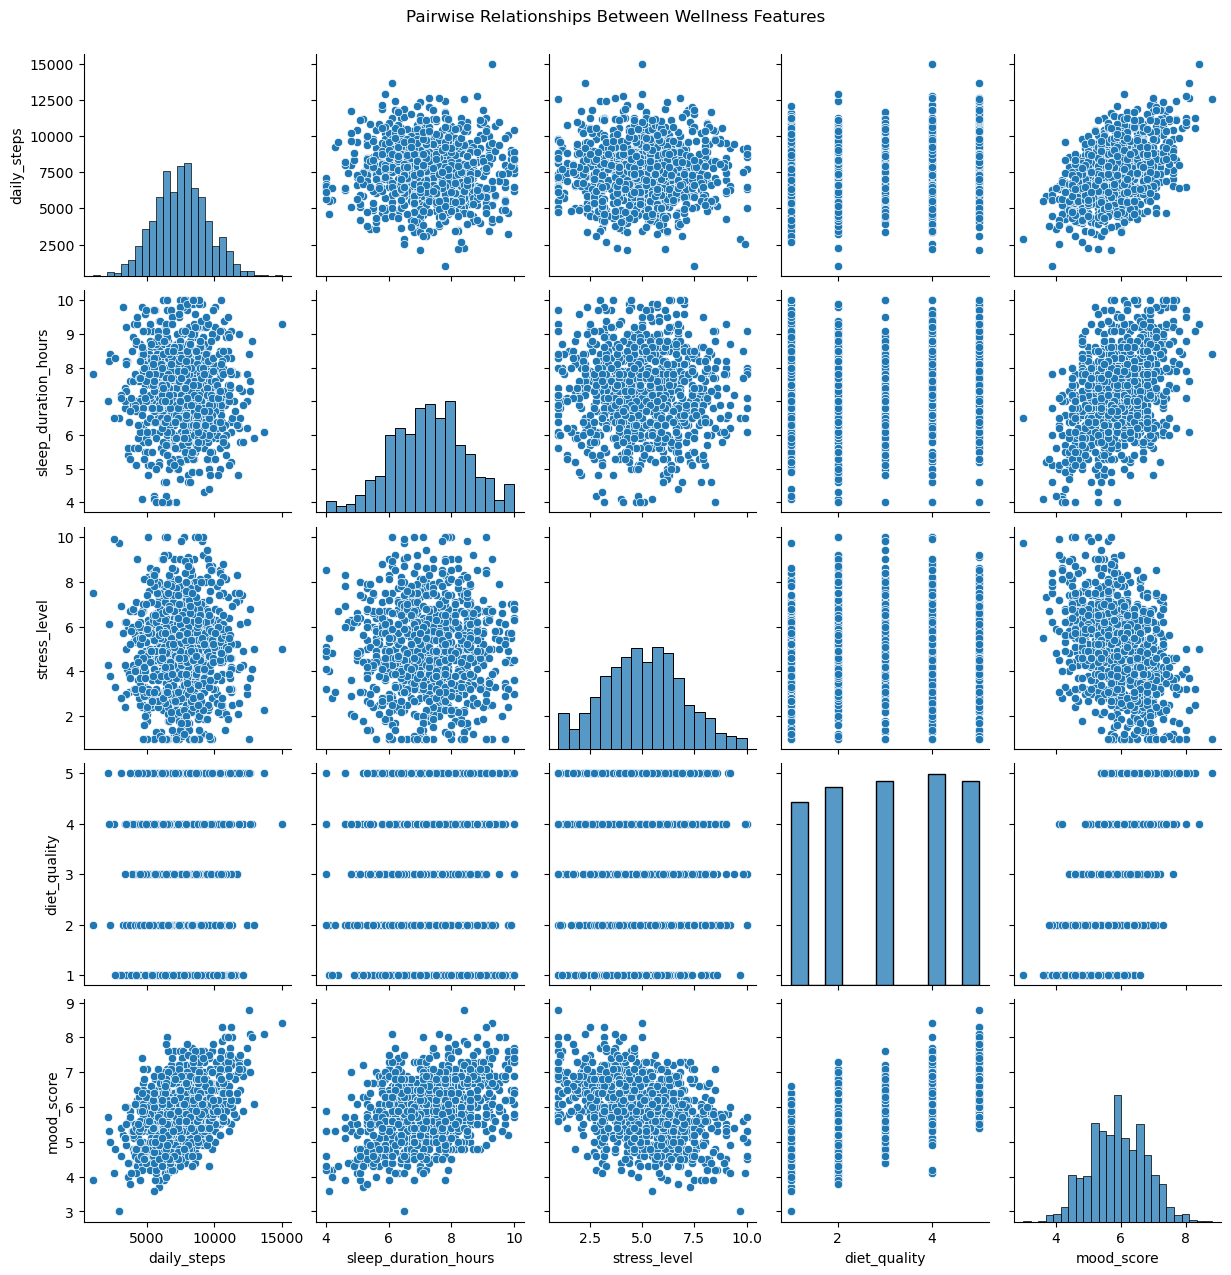

In [60]:
sns.pairplot(df)
plt.suptitle("Pairwise Relationships Between Wellness Features", y=1.02)
plt.show()

### 🔍 Understanding the Pairplot: Feature Relationships at a Glance

This pairplot gives a **comprehensive visual overview** of how each feature in the wellness dataset relates to every other feature. Here's how to interpret it:

#### 📊 Diagonal Plots: Feature Distributions
- The diagonal cells (from top-left to bottom-right) show **histograms** for each feature.
- These represent the **distribution** of values for:
  - `daily_steps`: bell-shaped, centered around ~7500
  - `sleep_duration_hours`: roughly normal, mean around 7
  - `stress_level`: symmetric, clipped at 1 and 10
  - `diet_quality`: discrete values from 1 to 5
  - `mood_score`: smooth bell-shaped curve due to weighted formula

#### 🔄 Off-Diagonal Plots: Scatterplots
- Each **off-diagonal cell** shows a **scatterplot** comparing two variables.
- These help identify **correlations, trends, or clusters** between features.

##### Key Relationships Observed:
- **`daily_steps` vs `mood_score`**: A slight upward trend — users who walk more tend to have better mood.
- **`sleep_duration_hours` vs `mood_score`**: Positive slope — longer sleepers tend to be in a better mood.
- **`stress_level` vs `mood_score`**: Downward spread — higher stress correlates with lower mood.
- **`diet_quality` vs `mood_score`**: Slight step-like trend — better diet quality corresponds to higher mood.

##### Additional Notes:
- Scatterplots involving `diet_quality` show **vertical lines**, which is expected for **categorical integer values**.
- Some scatterplots appear more random (e.g., `daily_steps` vs `stress_level`), indicating weaker or no correlation.

#### 🧠 Why This Is Useful:
This pairplot quickly highlights:
- Which features have strong or weak relationships
- How evenly distributed the data is
- If outliers or odd patterns exist
- Whether assumptions made during synthetic generation hold up visually

This tool is essential for early **exploratory data analysis (EDA)** before training any machine learning models.


In [61]:
a = df.columns.tolist()
a

['daily_steps',
 'sleep_duration_hours',
 'stress_level',
 'diet_quality',
 'mood_score']

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [70]:
X = df[a]
y = df['mood_score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

model = RandomForestRegressor(random_state = 42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test,y_pred)

The primary machine learning task within this Personalized Wellness AI system is to **predict the user's mood score** based on their wellness-related behavior data. These include activity level (`daily_steps`), recovery (`sleep_duration_hours`), dietary habits (`diet_quality`), and stress (`stress_level`).

---

### 🤖 ML Approach: Regression

Since `mood_score` is a **continuous numeric variable** ranging from 1 to 10, this is a **regression problem**. The regression model used were:

1. **Random Forest Regressor**

---

### ✅ Justification

#### 🔹 Random Forest Regressor
- **Strengths**:
  - Handles **non-linear relationships** between features and mood.
  - Provides **feature importance scores**, offering insights into which wellness factors most affect mood.
  - Robust to **outliers** and **noise** in the data.
- **Trade-offs**:
  - Less interpretable than simple linear models.
  - Can be computationally heavier, especially on larger datasets.

---


In [71]:
r2

0.9994071113174432

In [74]:
rmse = mean_squared_error(y_test,y_pred, squared = False)

In [75]:
rmse

0.02133740846494737

### 📏 Metrics

To evaluate the model's performance on the synthetic data, we used:

- **R² Score (Coefficient of Determination)**  
  Measures how well the model explains the variance in the target variable `mood_score`. A score close to 1 indicates high predictive accuracy.

- **RMSE (Root Mean Squared Error)**  
  Represents the average magnitude of prediction errors. It is useful for mood prediction, where large errors (e.g., predicting mood 3 when actual is 8) are more significant.

These metrics are well-suited for a **regression problem**, since our target variable `mood_score` is continuous.

---

### 🔁 Validation Strategy

We validated our model using a **simple train-test split**:

- **80%** of the data was used for training  
- **20%** was held out for testing  

This approach allows for quick performance feedback and avoids data leakage. It’s appropriate here given the dataset’s moderate size (1000 rows) and the controlled nature of synthetic data.

---

### 🔧 Future Refinements

With more time, the following improvements could be made:

- Implement **K-Fold Cross-Validation** for a more reliable performance estimate across multiple data splits.
- Use **hyperparameter tuning** (e.g., GridSearchCV) to optimize the Random Forest parameters such as `n_estimators`, `max_depth`, etc.
- Explore additional models like **Gradient Boosting** or **Linear Regression** for comparison.
- Introduce **feature importance analysis** to identify which wellness factors most influence mood predictions.

These steps would help increase both the performance and generalizability of the wellness prediction system.


In [90]:
evaluation_results_df

,Metric,Value
0,Train-Test Split R²,0.999
1,Train-Test Split RMSE,0.021


### 🌍 Real-World Value of Personalized Wellness AI

If deployed in a real-world health or lifestyle application, the Personalized Wellness AI system could provide meaningful benefits such as:

- **Personalized Mood Tracking**: Users could receive mood estimates based on their daily behavior without needing to manually log emotions.
- **Wellness Recommendations**: The system could suggest actionable improvements, like increasing daily steps, improving sleep routines, or reducing stress.
- **Early Mental Health Awareness**: By tracking dips in predicted mood, the system might detect potential stress overload or burnout early.
- **Habit Reinforcement**: Users could understand how consistent behaviors like good sleep and nutrition improve their mood, reinforcing healthy routines.

---

### ⚠️ Ethical Considerations & Risks

Despite the potential, several **risks and limitations** must be considered:

- **Privacy Concerns**: Collecting and analyzing health-related data (e.g., sleep, stress) requires robust data protection and user consent.
- **Over-Reliance on AI**: Users may make important lifestyle or mental health decisions based solely on model output, which may not always be accurate.
- **Bias in Predictions**: If real-world training data were used, demographic or behavioral biases could affect prediction fairness.

---

### 🧠 Summary

While the model shows strong performance on clean synthetic data, responsible deployment would require:

- Careful **data collection policies**
- Transparent **recommendation logic**
- Inclusion of **human-in-the-loop** decision-making

These measures ensure that wellness AI tools remain safe, fair, and effective in promoting healthier lifestyles.


## Challenges & Growth

### ⚙️ Challenges I Faced

The biggest challenge was designing the synthetic data in a way that felt realistic. I had to carefully think about:

- What ranges of values are normal for steps, sleep, and stress?
- How should these features affect mood?
- How do I make the data varied but not random?
---